In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/diabetes2.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
 df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (768, 9)


In [ ]:
numeric_cols = df.columns.drop('Outcome')

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print("Shape after outlier removal:", df.shape)


Shape after outlier removal: (636, 9)


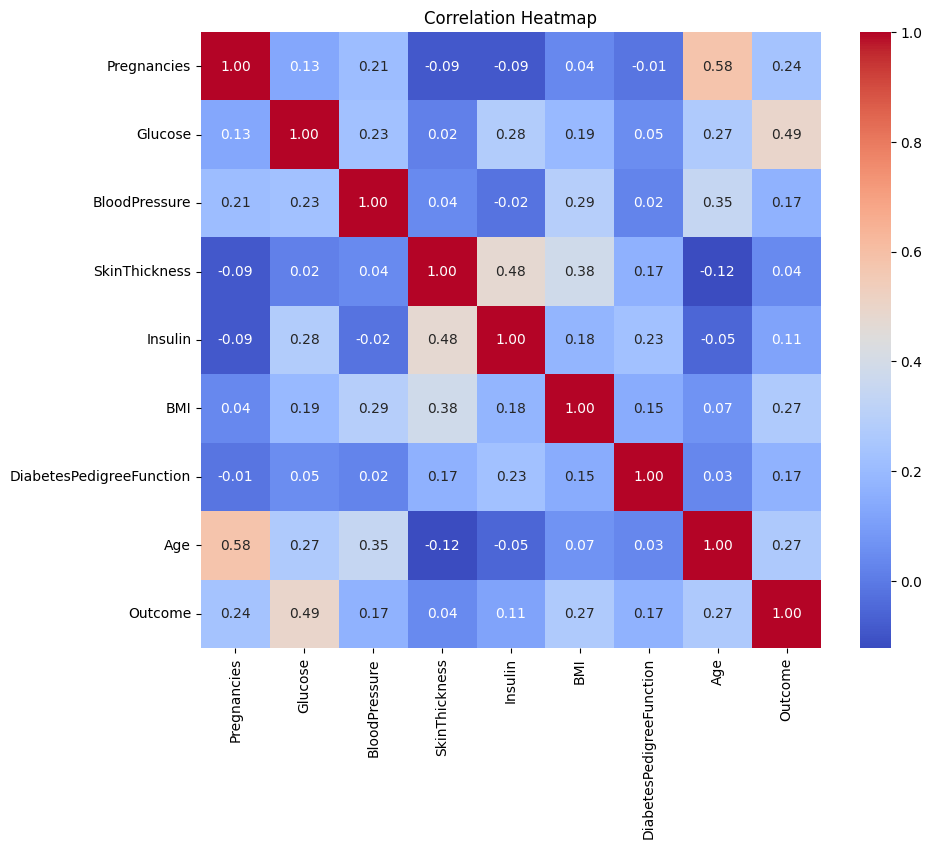

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()




In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000)

In [ ]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", round(train_acc, 4))
print("Test Accuracy:", round(test_acc, 4))


Train Accuracy: 0.8031
Test Accuracy: 0.7266


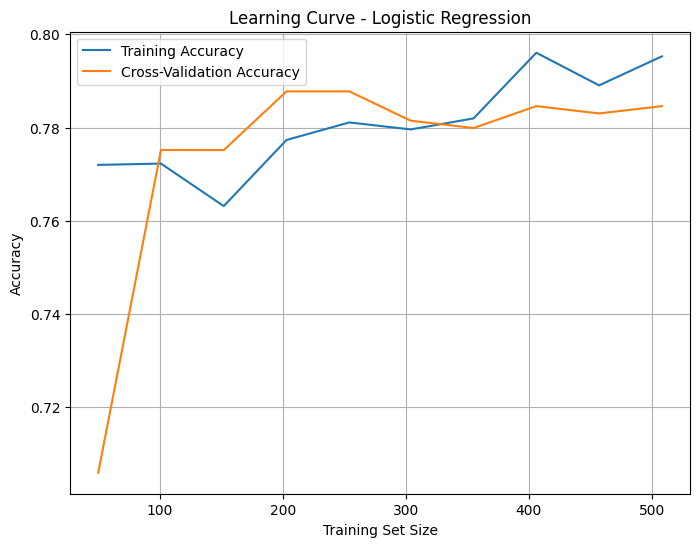

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    model, X_scaled, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy")
plt.plot(train_sizes, test_mean, label="Cross-Validation Accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Predictions
y_test_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.78      0.87      0.82        92
           1       0.52      0.36      0.43        36

    accuracy                           0.73       128
   macro avg       0.65      0.62      0.62       128
weighted avg       0.70      0.73      0.71       128



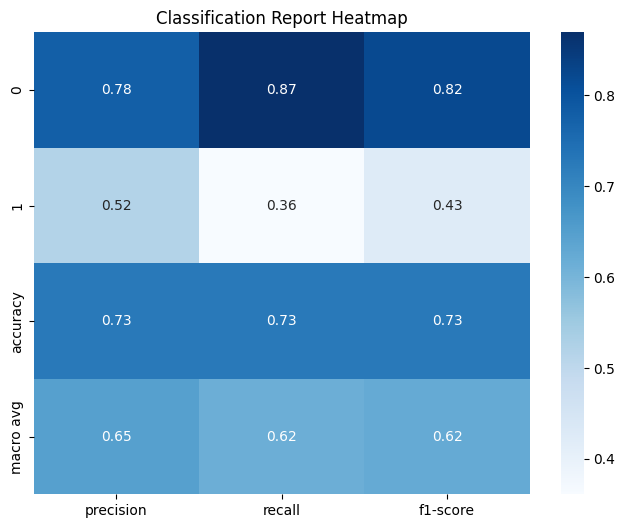

In [ ]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Get report as dictionary
report = classification_report(y_test, y_test_pred, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()


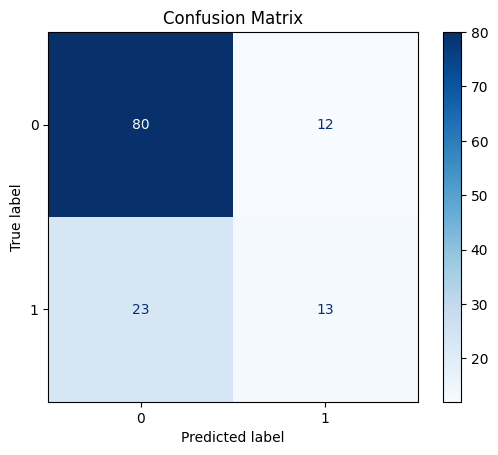

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()



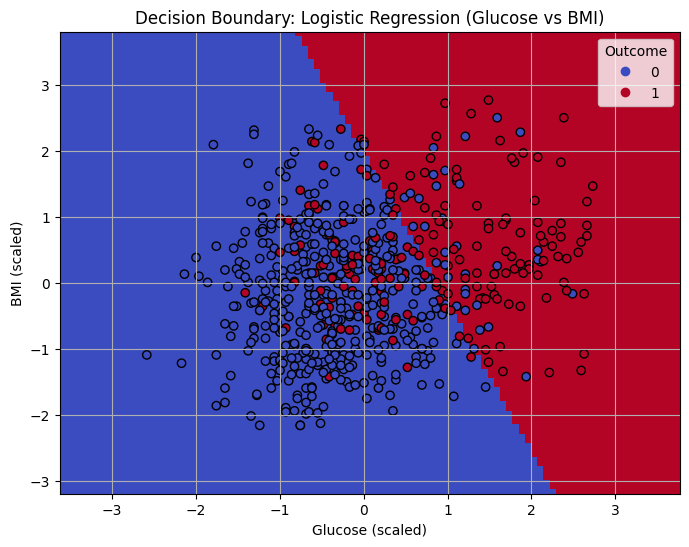

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

# Select 2 features (manually, based on correlation heatmap)
X_vis = df[['Glucose', 'BMI']]
y_vis = df['Outcome']

# Scale them
scaler = StandardScaler()
X_vis_scaled = scaler.fit_transform(X_vis)

# Train logistic model
model_vis = LogisticRegression()
model_vis.fit(X_vis_scaled, y_vis)

# Plot decision boundary
_, ax = plt.subplots(figsize=(8, 6))
disp = DecisionBoundaryDisplay.from_estimator(
    model_vis,
    X_vis_scaled,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    ax=ax,
    xlabel="Glucose (scaled)",
    ylabel="BMI (scaled)",
    plot_method="pcolormesh",
    shading="auto"
)

# Scatter actual data points
scatter = ax.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y_vis, edgecolor="k", cmap=plt.cm.coolwarm)
plt.title("Decision Boundary: Logistic Regression (Glucose vs BMI)")
plt.legend(*scatter.legend_elements(), title="Outcome")
plt.grid(True)
plt.show()
